# WeatherPy - Tyler Hill

In [190]:
import pandas as pd
import requests
import json
import random
import matplotlib.pyplot as plt
from scipy import stats
from pprint import pprint
from api_keys import weather_api_key
from citipy import citipy

In [191]:
# https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}

In [192]:
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Create lists to store values from for-loop
lats = []
lons = []
cities = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []

# Declare number of samples to calculate
num_samples = 1500

for x in range(num_samples):
    
    # Randomly generate Latitude and Longitude, append values
    lat = random.uniform(-90,90)
    lon = random.uniform(-180,180)
    
    # Grab nearest city from Lat + Lon, then append 'cities' list
    city = citipy.nearest_city(lat, lon)
    f_city = city.city_name.title()
    f_country = city.country_code.upper()
    city_country = f'{f_city}, {f_country}'
    if city_country not in cities:
        cities.append(city_country)
print(f'{len(cities)} cities collected')

607 cities collected


In [193]:
city = []
c_lats = []
c_lons = []
for i, response in enumerate(cities):
    q_url = f'{url}&units={units}&q={cities[i]}&APPID={weather_api_key}'
    response = requests.get(q_url).json()
    try:
        temp = response["main"]["temp"]
        humid = response["main"]["humidity"]
        cloud = response["clouds"]["all"]
        wind = response["wind"]["speed"]
        latc = response["coord"]["lat"]
        lonc = response["coord"]["lon"]
        c_lats.append(latc)
        c_lons.append(lonc)
        city.append(cities[i])
        temperature.append(temp)
        humidity.append(humid)
        cloudiness.append(cloud)
        wind_speed.append(wind)
        print(f'[{i}]: {cities[i]}')
    except:
        print("No data")
        pass
print("-----------------------")
print("Data retrieval complete")

[0]: Pionki, PL
[1]: Hermanus, ZA
[2]: Larap, PH
[3]: Kirakira, SB
[4]: Ushuaia, AR
[5]: Pisco, PE
[6]: Cherskiy, RU
[7]: Busselton, AU
[8]: Kutum, SD
[9]: Hobart, AU
[10]: Sibolga, ID
[11]: Kodiak, US
[12]: Faanui, PF
[13]: Cape Town, ZA
[14]: Rikitea, PF
[15]: Tuktoyaktuk, CA
[16]: Vao, NC
[17]: Atuona, PF
[18]: Bluff, NZ
[19]: Cockburn Town, BS
[20]: Upernavik, GL
[21]: Vaini, TO
[22]: Dingle, IE
[23]: Kishtwar, IN
[24]: Yellowknife, CA
[25]: Kavieng, PG
[26]: Saskylakh, RU
[27]: Mahebourg, MU
[28]: Qaanaaq, GL
[29]: Merke, KZ
[30]: Bondowoso, ID
[31]: Celestun, MX
[32]: Punta Arenas, CL
[33]: Keti Bandar, PK
[34]: Puerto Ayora, EC
[35]: Siddipet, IN
[36]: New Norfolk, AU
[37]: Butaritari, KI
[38]: Saint-Leu, RE
[39]: Grafton, AU
[40]: Kambove, CD
[41]: Castro, CL
[42]: Buraydah, SA
[43]: Irbeyskoye, RU
[44]: Ponta Do Sol, CV
No data
[46]: Mamakan, RU
[47]: Kapaa, US
[48]: Makokou, GA
[49]: Zverinogolovskoye, RU
[50]: Marolambo, MG
No data
[52]: Padang, ID
[53]: Ostrovnoy, RU
[54]: 

[438]: Vila Franca Do Campo, PT
[439]: Vostochnyy, RU
[440]: Moorhead, US
[441]: Iqaluit, CA
[442]: Verkhoyansk, RU
[443]: Chapleau, CA
[444]: Peniche, PT
[445]: Mandan, US
[446]: Nicosia, IT
[447]: Nanhai, CN
[448]: Lagoa, PT
[449]: Acapulco, MX
[450]: Burnie, AU
[451]: Xining, CN
No data
[453]: Kalmar, SE
[454]: Nome, US
[455]: Nyrob, RU
[456]: Ukiah, US
[457]: Karlskrona, SE
No data
[459]: Harer, ET
[460]: Rafai, CF
[461]: Hasaki, JP
[462]: Olafsvik, IS
[463]: Mount Isa, AU
No data
[465]: Geraldton, AU
No data
[467]: Pareora, NZ
[468]: Mitha Tiwana, PK
[469]: Berlevag, NO
[470]: Goure, NE
No data
[472]: Berdigestyakh, RU
[473]: Cibinong, ID
[474]: Natal, BR
[475]: Villa Rica, PE
[476]: Evensk, RU
[477]: Lavrentiya, RU
[478]: Pinhao, BR
No data
[480]: Sisimiut, GL
[481]: Topolobampo, MX
[482]: Torbay, CA
[483]: Lotofaga, WS
[484]: Farmington, US
[485]: Buzmeyin, TM
[486]: Lernanist, AM
[487]: Adrar, DZ
[488]: Kisangani, CD
[489]: Hopelchen, MX
[490]: Saint-Augustin, CA
[491]: Sehwan,

In [195]:
# Build dataframe from collected values
df = pd.DataFrame({
    "City": city,
    "Latitude": c_lats,
    "Longitude": c_lons,
    "Temperature": temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
})

# Display dataframe
df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,"Pionki, PL",51.4760,21.4499,40.12,49,1,4.61
1,"Hermanus, ZA",-34.4187,19.2345,55.49,70,12,3.51
2,"Larap, PH",14.2990,122.6504,86.52,65,71,9.06
3,"Kirakira, SB",-10.4544,161.9205,84.87,68,55,3.89
4,"Ushuaia, AR",-54.8000,-68.3000,40.66,81,20,13.80


In [196]:
# Write DataFrame to csv
output_file = "Output/WeatherPy.csv"
df.to_csv(output_file,index=False, header=True)

In [197]:
# Declare column values for ease of use
c_lats = df["Latitude"]
c_lons = df["Longitude"]
temps = df["Temperature"]
humids = df["Humidity"]
clouds = df["Cloudiness"]
winds = df["Wind Speed"]

In [198]:
# Determine max and min values to determine xlim for each plot
clon_min = c_lons.min()
clon_max = c_lons.max()
clat_min = c_lats.min()
clat_max = c_lats.max()

temp_min = temps.min()
temp_max = temps.max()

humid_min = humids.min()
humid_max = humids.max()

cloud_min = clouds.min()
cloud_max = clouds.max()

wind_min = winds.min()
wind_max = winds.max()

# Scatter Plots

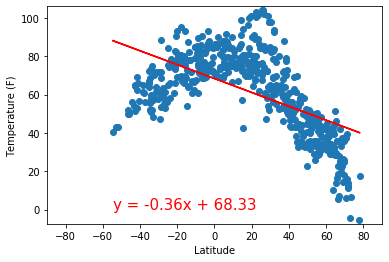

In [199]:
# # Temp vs. Latitude
# plt.scatter(c_lats, temps)
# plt.ylabel("Temperature (F)")
# plt.xlabel("Latitude")
# plt.xlim(-90,90)
# plt.ylim(temp_min-2, temp_max+2)

# slope, int, r, p, std_err = stats.linregress(c_lats, temps)
# y = slope * c_lats + int
# plt.plot(c_lats,y,c="r")
# line = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
# plt.annotate(line,(clat_min,0),fontsize=15,color="red")

# plt.savefig("Output/Images/temp_vs_lat.png")

In [255]:
# t = [temp_min, temp_max]
# h = [humid_min, humid_max]
# c = [cloud_min, cloud_max]
# w = [wind_min, wind_max]


# Lists created to store values for plotting function
# Lists of each variable to plot
thcw = [temps, humids, clouds, winds]
# Variable strings
names = ["Temperature (F)","Humidity (%)","Cloudiness (%)","Wind Speed (mph)",]
# .png output filenames
save_fig = ["Output/Images/temperature_vs_lat.png","Output/Images/humidity_vs_lat.png","Output/Images/cloudiness_vs_lat.png","Output/Images/windspeed_vs_lat.png"]
face_colors = ["blue","green","red","yellow"]

Plot created for Temperature (F) vs. Latitude
Plot created for Humidity (%) vs. Latitude
Plot created for Cloudiness (%) vs. Latitude
Plot created for Wind Speed (mph) vs. Latitude
---------------------

Plotting Complete: Four plots created in /Output/Images folder


<Figure size 432x288 with 0 Axes>

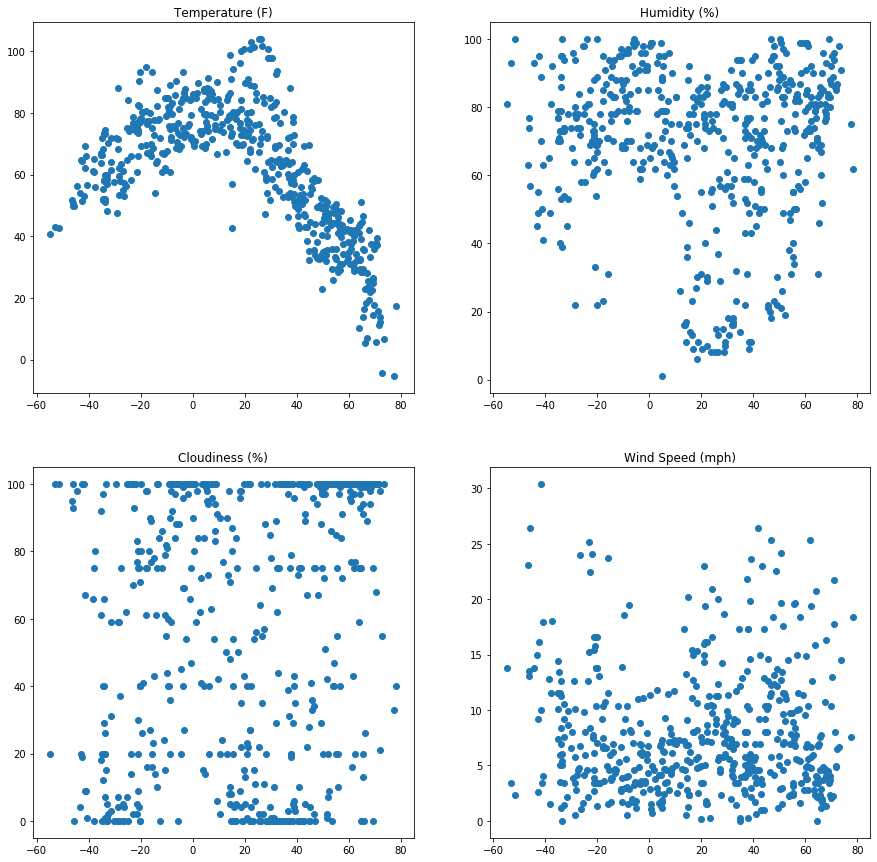

In [256]:
# Plotting function to plot four different variables against Latitude:
# Temp, Humidity, Cloudiness, Windspeed
def plot():
    plot_figs = []
    for i in range(len(thcw)):
        fig = plt.scatter(c_lats, thcw[i], marker="o")
        fig.set_facecolor(face_colors[i])
        plt.ylabel(names[i])
        plt.xlabel("Latitude")
        plt.xlim(clat_min+2,clat_max+2)
        
        slope, int, r, p, std_err = stats.linregress(c_lats, thcw[i])
        y = slope * c_lats + int
        plt.plot(c_lats,y,c="r")
        
        plot_figs.append(fig)
        plt.savefig(save_fig[i])
        print(f'Plot created for {names[i]} vs. Latitude')
        slope, int, r, p, std_err = [0,0,0,0,0]
        plt.clf()

        
    figure, axis = plt.subplots(2,2,figsize=(15,15))
    axis[0, 0].scatter(c_lats, thcw[0])
    axis[0, 0].set_title(names[0])
    axis[0, 1].scatter(c_lats, thcw[1])
    axis[0, 1].set_title(names[1])
    axis[1, 0].scatter(c_lats, thcw[2])
    axis[1, 0].set_title(names[2])   
    axis[1, 1].scatter(c_lats, thcw[3])
    axis[1, 1].set_title(names[3])
    
    print("---------------------")
    print("")
    print("Plotting Complete: Four plots created in /Output/Images folder")

plot()

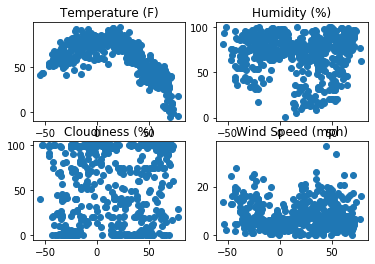

In [182]:
def plot():
    figure, axis = plt.subplots(2,2)
    axis[0, 0].scatter(c_lats, thcw[0])
    axis[0, 0].set_title(names[0])
    axis[0, 1].scatter(c_lats, thcw[1])
    axis[0, 1].set_title(names[1])
    axis[1, 0].scatter(c_lats, thcw[2])
    axis[1, 0].set_title(names[2])   
    axis[1, 1].scatter(c_lats, thcw[3])
    axis[1, 1].set_title(names[3])
        
plot()

Text(-54.8, 0, 'y = -0.37x + 66.11')

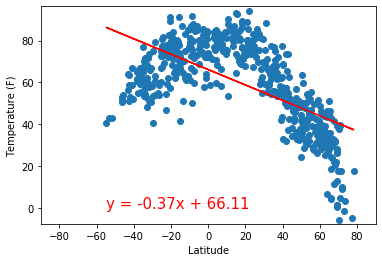

In [62]:
# Humidity vs. Latitude
plt.scatter(c_lats, humids)
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(-90,90)
plt.ylim(humid_min-2, humid_max+2)

slope, int, r, p, std_err = stats.linregress(c_lats, temps)
y = slope * c_lats + int
plt.plot(c_lats,y,c="r")
line = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(line,(clat_min,0),fontsize=15,color="red")

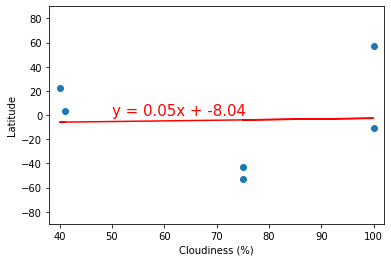

In [105]:
# Cloudiness vs. Latitude
plt.scatter(clouds, lats)
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.ylim(-90,90)
plt.xlim(cloud_min-2, cloud_max+2)

slope, int, r, p, std_err = stats.linregress(clouds, lats)
y = slope * clouds + int
plt.plot(clouds,y,c="r")
line = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(line,(cloud_min+10,0),fontsize=15,color="red")

plt.savefig("Output/Images/cloud_vs_lat.png")

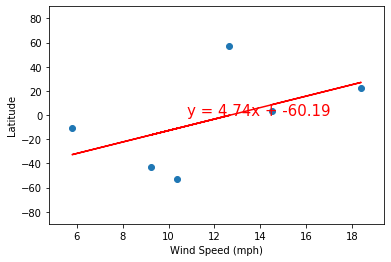

In [106]:
# Wind speed vs. Latitude
plt.scatter(winds, lats)
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.ylim(-90,90)
plt.xlim(wind_min-1, wind_max+1)

slope, int, r, p, std_err = stats.linregress(winds, lats)
y = slope * winds + int
plt.plot(winds,y,c="r")
line = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(line,(wind_min+5,0),fontsize=15,color="red")

plt.savefig("Output/Images/windspeed_vs_lat.png")

# Separate values into Northern and Southern Hemispheres

In [107]:
hemisphere = []
for index, row in df.iterrows():
    lat = row["Latitude"]
    if lat >= 0:
        hem = "Northern"
        hemisphere.append(hem)
    elif lat < 0:
        hem = "Southern"
        hemisphere.append(hem)
df["Hemisphere"] = hemisphere
df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Hemisphere
0,"Butaritari, KI",3.0707,172.7902,82.18,78,41,14.50,Northern
1,"Kapaa, US",22.0752,-159.3190,73.78,86,40,18.41,Northern
2,"Hualmay, PE",-11.0964,-77.6139,65.28,93,100,5.79,Southern
3,"Sitka, US",57.0531,-135.3300,48.09,61,100,12.66,Northern
4,"Hobart, AU",-42.8794,147.3294,61.57,54,75,9.22,Southern


In [108]:
n_hem = df.loc[(df["Hemisphere"]) == "Northern"]
s_hem = df.loc[(df["Hemisphere"]) == "Southern"]

In [109]:
n_lats = n_hem["Latitude"]
s_lats = s_hem["Latitude"]
n_longs = n_hem["Longitude"]
s_longs = s_hem["Longitude"]
n_temps = n_hem["Temperature"]
s_temps = s_hem["Temperature"]
n_humids = n_hem["Humidity"]
s_humids = s_hem["Humidity"]
n_clouds = n_hem["Cloudiness"]
s_clouds = s_hem["Cloudiness"]
n_winds = n_hem["Wind Speed"]
s_winds = s_hem["Wind Speed"]

In [110]:
min_n_temps = n_temps.min()
max_n_temps = n_temps.max()
min_s_temps = s_temps.min()
max_s_temps = s_temps.max()

min_n_humids = n_humids.min()
max_n_humids = n_humids.max()
min_s_humids = s_humids.min()
max_s_humids = s_humids.max()

min_n_clouds = n_clouds.min()
max_n_clouds = n_clouds.max()
min_s_clouds = s_clouds.min()
max_s_clouds = s_clouds.max()

min_n_winds = n_winds.min()
max_n_winds = n_winds.max()
min_s_winds = s_winds.min()
max_s_winds = s_winds.max()

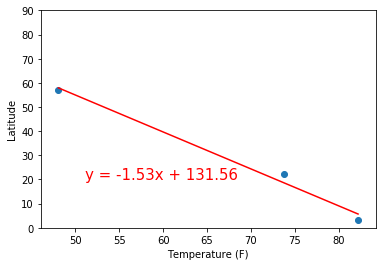

In [111]:
# Temp vs. Latitude # Northern Hemisphere
plt.scatter(n_temps, n_lats)
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.ylim(0,90)
plt.xlim(min_n_temps-2, max_n_temps+2)

slope, int, r, p, std_err = stats.linregress(n_temps, n_lats)
y = slope * n_temps + int
plt.plot(n_temps,y,c="r")
line = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(line,(min_n_temps+3,20),fontsize=15,color="red")

plt.savefig("Output/Images/Northern Hemisphere/temps_vs_lat.png")

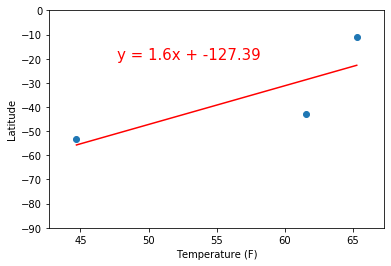

In [112]:
# Temp vs. Latitude # Southern Hemisphere
plt.scatter(s_temps, s_lats)
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.ylim(-90,0)
plt.xlim(min_s_temps-2, max_s_temps+2)

slope, int, r, p, std_err = stats.linregress(s_temps, s_lats)
y = slope * s_temps + int
plt.plot(s_temps,y,c="r")
line = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(line,(min_s_temps+3,-20),fontsize=15,color="red")

plt.savefig("Output/Images/Southern Hemisphere/temps_vs_lat.png")

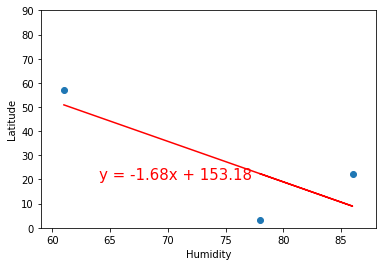

In [113]:
# Humidity vs. Latitude # Northern Hemisphere
plt.scatter(n_humids, n_lats)
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.ylim(0,90)
plt.xlim(min_n_humids-2, max_n_humids+2)

slope, int, r, p, std_err = stats.linregress(n_humids, n_lats)
y = slope * n_humids + int
plt.plot(n_humids,y,c="r")
line = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(line,(min_n_humids+3,20),fontsize=15,color="red")

plt.savefig("Output/Images/Northern Hemisphere/humid_vs_lat.png")

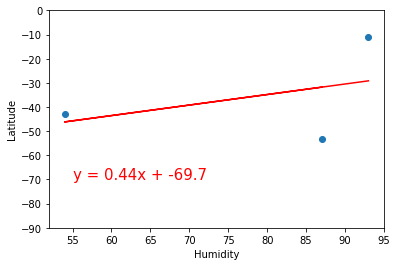

In [114]:
# Humidity vs. Latitude # Southern Hemisphere
plt.scatter(s_humids, s_lats)
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.ylim(-90,0)
plt.xlim(min_s_humids-2, max_s_humids+2)

slope, int, r, p, std_err = stats.linregress(s_humids, s_lats)
y = slope * s_humids + int
plt.plot(s_humids,y,c="r")
line = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(line,(min_s_humids+1,-70),fontsize=15,color="red")

plt.savefig("Output/Images/Southern Hemisphere/humid_vs_lat.png")

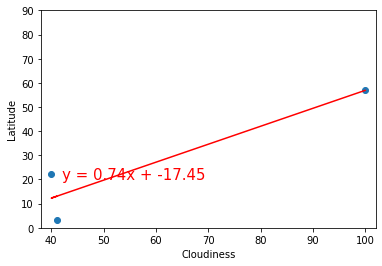

In [115]:
# Cloudiness vs. Latitude # Northern Hemisphere
plt.scatter(n_clouds, n_lats)
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.ylim(0,90)
plt.xlim(min_n_clouds-2, max_n_clouds+2)

slope, int, r, p, std_err = stats.linregress(n_clouds, n_lats)
y = slope * n_clouds + int
plt.plot(n_clouds,y,c="r")
line = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(line,(min_n_clouds+2,20),fontsize=15,color="red")

plt.savefig("Output/Images/Northern Hemisphere/cloud_vs_lat.png")

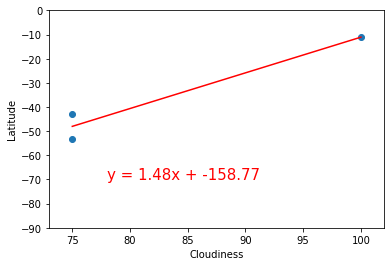

In [116]:
# Cloudiness vs. Latitude # Southern Hemisphere
plt.scatter(s_clouds, s_lats)
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.ylim(-90,0)
plt.xlim(min_s_clouds-2, max_s_clouds+2)

slope, int, r, p, std_err = stats.linregress(s_clouds, s_lats)
y = slope * s_clouds + int
plt.plot(s_clouds,y,c="r")
line = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(line,(min_s_clouds+3,-70),fontsize=15,color="red")

plt.savefig("Output/Images/Southern Hemisphere/cloud_vs_lat.png")

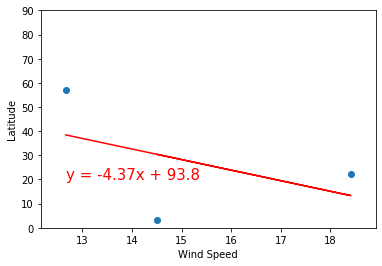

In [117]:
# Wind Speed vs. Latitude # Northern Hemisphere
plt.scatter(n_winds, n_lats)
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.ylim(0,90)
plt.xlim(min_n_winds-0.5, max_n_winds+0.5)

slope, int, r, p, std_err = stats.linregress(n_winds, n_lats)
y = slope * n_winds + int
plt.plot(n_winds,y,c="r")
line = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(line,(min_n_winds,20),fontsize=15,color="red")

plt.savefig("Output/Images/Northern Hemisphere/windspeed_vs_lat.png")

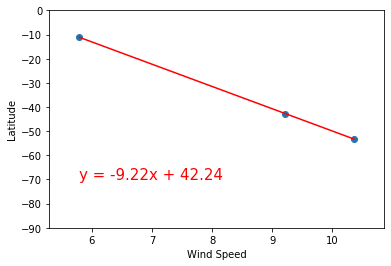

In [118]:
# Wind Speed vs. Latitude # Southern Hemisphere
plt.scatter(s_winds, s_lats)
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.ylim(-90,0)
plt.xlim(min_s_winds-0.5, max_s_winds+0.5)

slope, int, r, p, std_err = stats.linregress(s_winds, s_lats)
y = slope * s_winds + int
plt.plot(s_winds,y,c="r")
line = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))
plt.annotate(line,(min_s_winds,-70),fontsize=15,color="red")

plt.savefig("Output/Images/Southern Hemisphere/windspeed_vs_lat.png")